<a href="https://colab.research.google.com/github/sulthannauval/MachineLearning-Course/blob/main/Tugas-Minggu-2/2_Linear_Regression_Sulthan_1103213065.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

Lecture 2 - Linear Regression - Salary_Data_Simple_SVR.csv

---

*   Nama : Sulthan Nauval Abdillah
*   NIM : 1103213065
*   ChatGPT : [link text](https://chat.openai.com/share/fb96ba0e-caca-4a82-9121-1362afe6ac89)

##  Prompt ChatGPT : beri kode untuk menyambungkan google drive dengan google colab

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

# Muat dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/Salary_Data_Simple_SVR.csv")

## Prompt ChatGPT : Ingin membuat model linear regression dengan dataset Salary_Data_Simple_SVR.csv bagaimana tahapannya?


### Explorasi Data

In [16]:
data.head()  # Melihat lima baris pertama dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [17]:
data.info()  # Melihat informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


### Persiapan Data

In [18]:
X = data.iloc[:, :-1].values  # Fitur (pengalaman kerja)
y = data.iloc[:, 1].values    # Label (gaji)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Buat dan Latih Model

In [19]:
# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

LinearRegression()

### Evaluasi Model

In [22]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 49830096.85590839


### Visualisasi Hasil

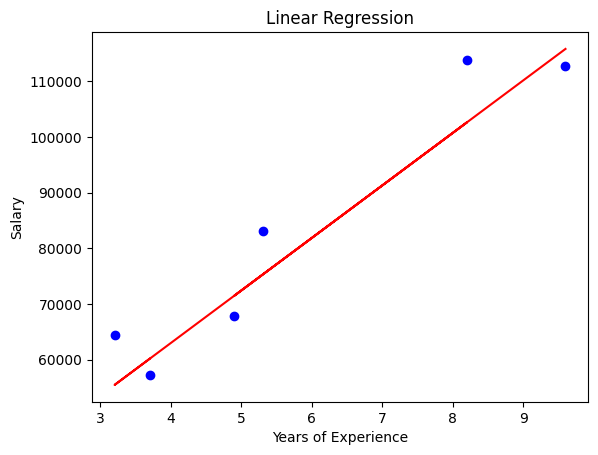

In [21]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Prompt ChatGPT : beri kode untuk melakukan evaluasi dengan menggunakan RMSE, MAE, MAPPE, R2

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Menghitung R^2
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Coefficient of Determination (R^2 Score):", r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216
Coefficient of Determination (R^2 Score): 0.9024461774180497


## Prompt ChatGPT : Bagaimana cara memvisualisasikan data train, data test, dengan garis regresi dari modelnya?

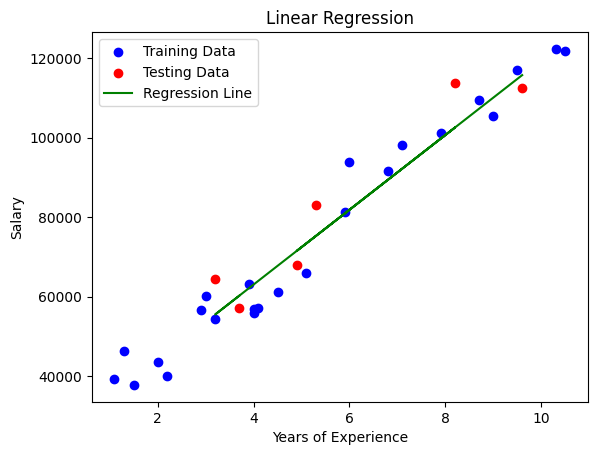

In [25]:
# Plot data latih
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot data uji
plt.scatter(X_test, y_test, color='red', label='Testing Data')

# Plot garis regresi
plt.plot(X_test, y_pred, color='green', label='Regression Line')

plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Prompt ChatGPT : Bagaimana cara mengetahui berapa nilai actual dari data test, dengan nilai prediksi dari model? juga tampilkan kolom YearsExperience

In [27]:
# Membuat DataFrame untuk data uji
df_test = pd.DataFrame({'YearsExperience': X_test.reshape(-1), 'ActualSalary': y_test, 'PredictedSalary': y_pred})

# Menampilkan DataFrame
df_test

,YearsExperience,ActualSalary,PredictedSalary
0,9.6,112635.0,115790.210113
1,4.9,67938.0,71498.278095
2,8.2,113812.0,102596.868661
3,5.3,83088.0,75267.804224
4,3.2,64445.0,55477.792045
5,3.7,57189.0,60189.699707


### Bagaimana cara menginputkan data baru dan meminta supaya model memberikan prediksi dari data yang kita masukkan?

In [28]:
# Meminta pengguna untuk memasukkan nilai pengalaman kerja
new_experience = float(input("Masukkan nilai pengalaman kerja yang ingin diprediksi gajinya: "))

# Membuat prediksi menggunakan model
predicted_salary = model.predict([[new_experience]])

print("Prediksi gaji untuk pengalaman kerja", new_experience, "tahun adalah:", predicted_salary[0])

Masukkan nilai pengalaman kerja yang ingin diprediksi gajinya: 10
Prediksi gaji untuk pengalaman kerja 10.0 tahun adalah: 119559.73624208657
